# Hierarachical Clustering

### Análisis exploratorio de datos

#### 1.Identificación de relación entre variables valores atípitos, tendencias, etc...

In [1]:
#importar librerias
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # Se corrigió el nombre de la clase StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage  # Se corrigió el nombre de la función 'impoer' a 'import' y el nombre 'dendrogram'
from sklearn.metrics import silhouette_score  # Se corrigió el nombre de la función 'silhouetter_score'
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Cargar dataset
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape
data=dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Análisis estadistico

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


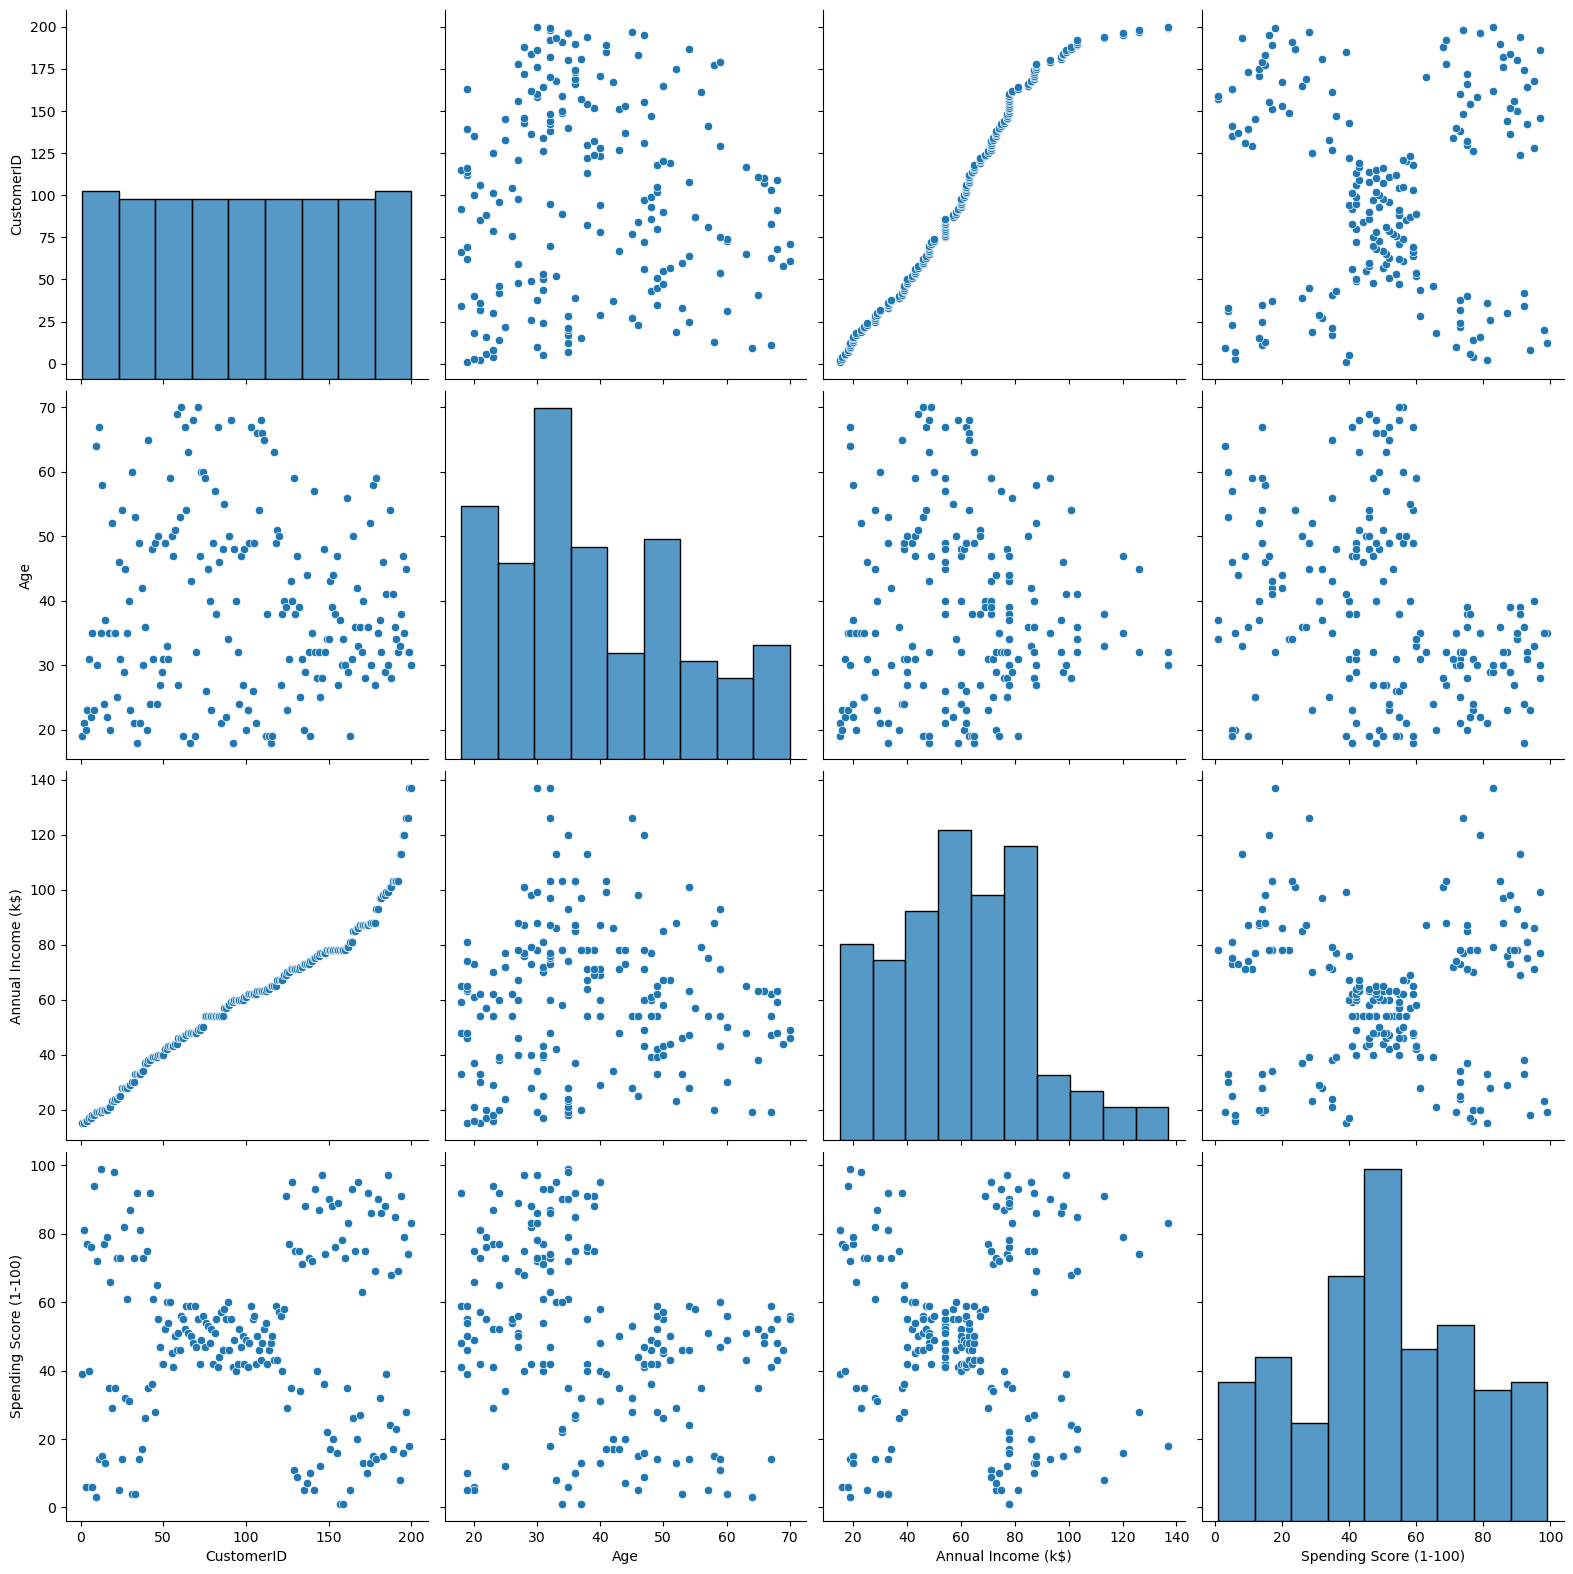

In [6]:
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [7]:
#convertir variable categorica en numerica
mapeo_genero = {'Female': 1, 'Male': 0}
data['Gender'] = data['Gender'].map(mapeo_genero)

In [8]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


<Axes: >

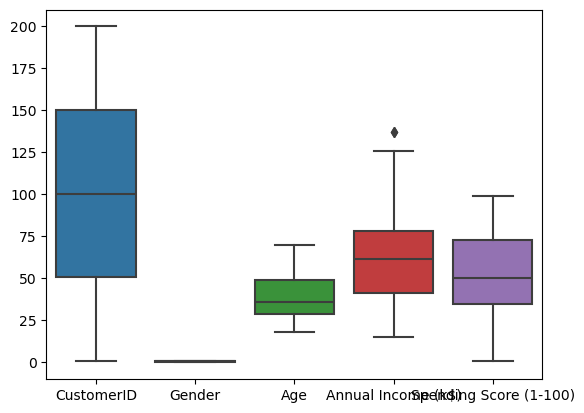

In [9]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

#### 2.Limpieza de datos, tratamiento de datos faltantes y transformación

In [10]:
print("Cantidad de datos para variable -CustomerID- sin información: ", data['CustomerID'].isin([0]).sum())
print("Cantidad de datos para variable -Gender- sin información: ", data['Gender'].isin([0]).sum())
print("Cantidad de datos para variable -Age- sin información: ", data['Age'].isin([0]).sum())
print("Cantidad de datos para variable -Annual Income (k$)- sin información:", data['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de datos para variable -Spending Score (1-100)- sin información: ", data['Spending Score (1-100)'].isin([0]).sum())

Cantidad de datos para variable -CustomerID- sin información:  0
Cantidad de datos para variable -Gender- sin información:  88
Cantidad de datos para variable -Age- sin información:  0
Cantidad de datos para variable -Annual Income (k$)- sin información: 0
Cantidad de datos para variable -Spending Score (1-100)- sin información:  0


In [11]:
#Contar datos atipicos variable acidez fija
nivel_min = 15
nivel_max = 137
Cant_Atipicos=((data['Annual Income (k$)']<nivel_min)|(data['Annual Income (k$)']>nivel_max)).sum()
print("El total de los datos atipicos para variable -Annual Income (k$)- es {}".format(Cant_Atipicos))

El total de los datos atipicos para variable -Annual Income (k$)- es 0


#### 3.Selección de características más relevantes para entrenar el modelo

Datos de interes: Ingreso y puntuación de gastos

In [12]:
#Filtrat columnas para entrenamiento
data = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [13]:
#Revisión de datos
data.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


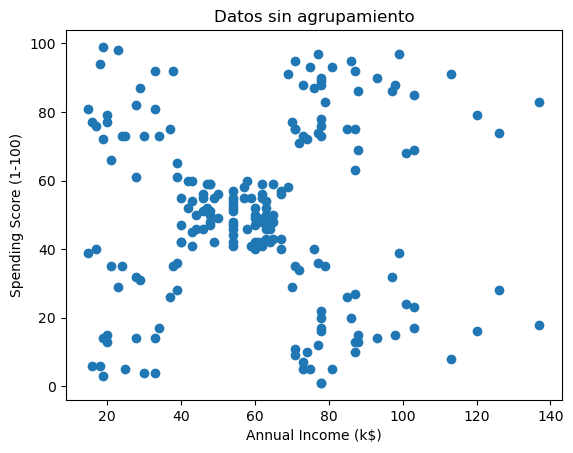

In [14]:
#Grafica sin agrupamiento
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.title('Datos sin agrupamiento')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### 4.Entrenar modelo configurando los diferentes hiperparámetros

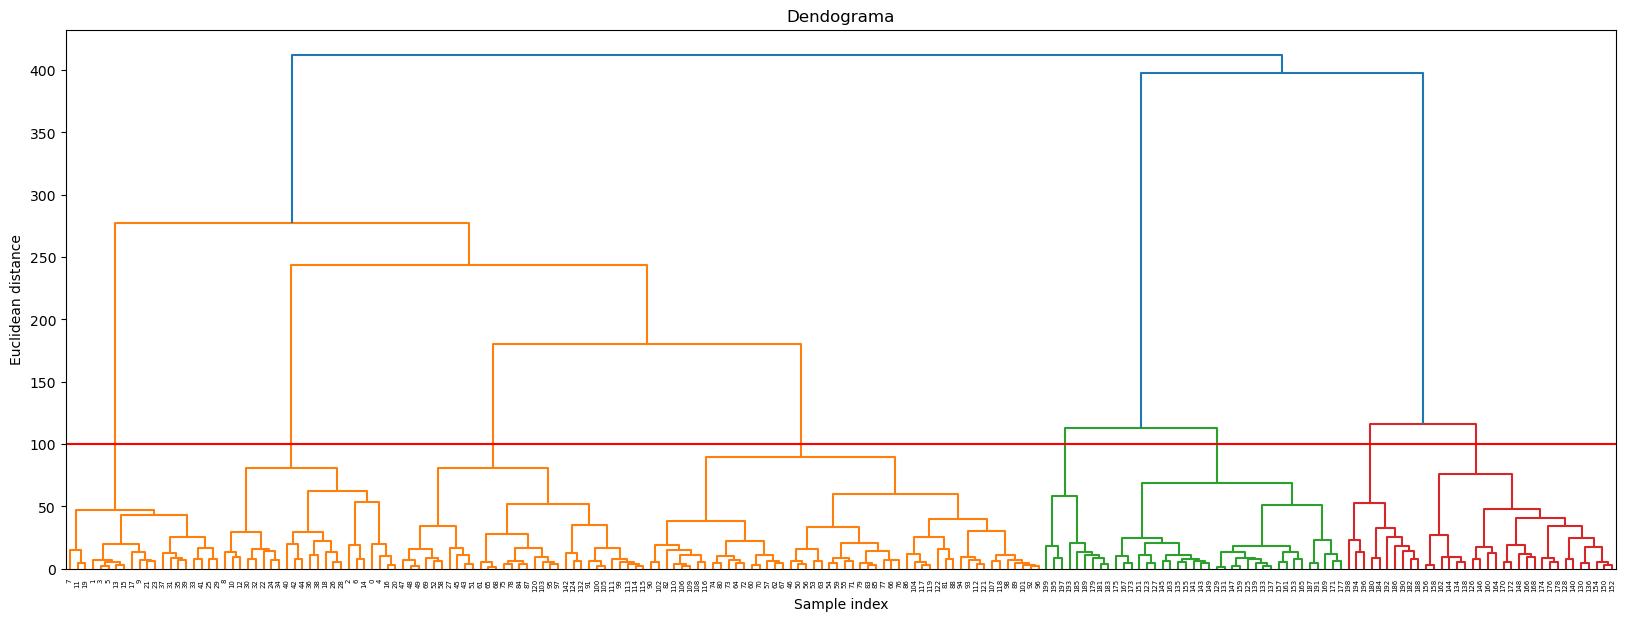

In [39]:
#Entrenar con Hierarchical Clustering
ward_clustering = linkage(data, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y=100,color='r', linestyle='-')
plt.title('Dendograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [20]:
hier_clustering = AgglomerativeClustering(n_clusters=7)
labels_hier = hier_clustering.fit_predict(data)
labels_hier

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 5, 0, 5, 0, 5, 0,
       2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0], dtype=int64)

In [ ]:
Acá se indica el clúster a que pertenece casa dato

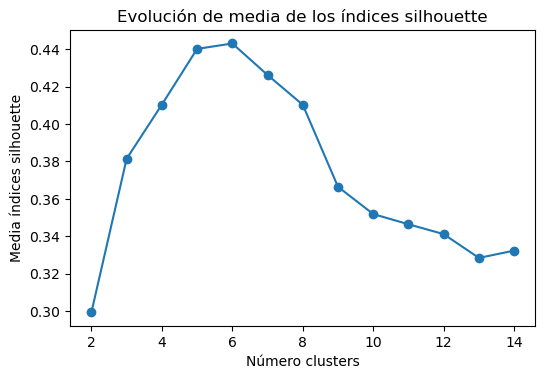

In [32]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

#### 5.Evaluar desempeño del modelo con el Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [28]:
##Calcular medidas de cantidad para Hierarchical Clustering

print('Medidas de calidad para K-Means')
print("Puntaje de silueta:", metrics.silhouette_score(data, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(data, labels))
print("Índice Davies-Bouldin:", metrics.davies_bouldin_score(data, labels))

Medidas de calidad para K-Means
Puntaje de silueta: 0.4262301125101286
Índice de Calinski-Harabasz: 152.93577235754373
Índice Davies-Bouldin: 0.8517013518157939


#### 6.Realización de graficas para visualizar resultados del modelo

In [29]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

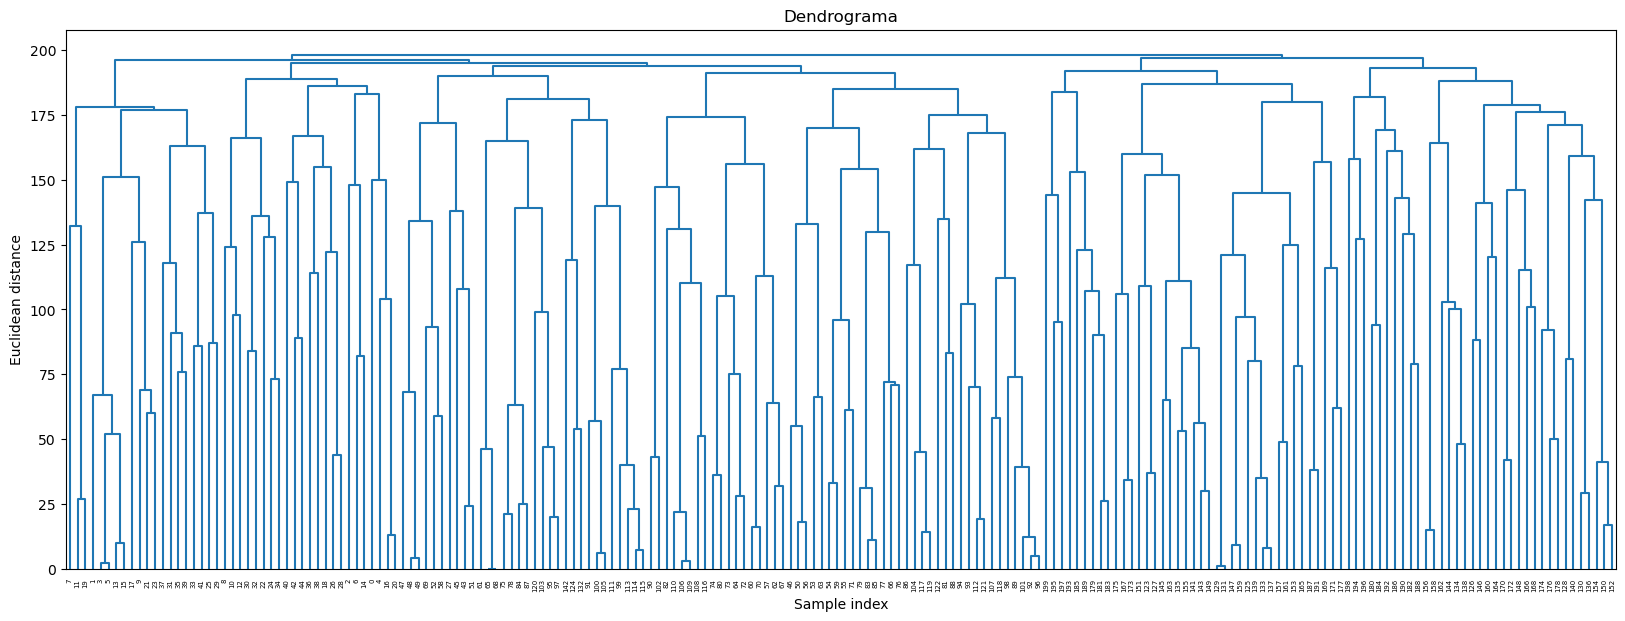

In [30]:
plot_dendrogram(hier_clustering, color_threshold=0)

In [37]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
data_dist = pdist(data)
# Compute the linkage matrix
Z = linkage(data, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, data_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.66866802140347, array([277.42153431,  53.60747993, 277.42153431, ..., 397.74740753,
        18.27566688, 397.74740753]))


#### 7.Interpretación y análisis de resultados